# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

Import packages and read in data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


df = pd.read_csv('data/human_body_temperature.csv')

Check how data looks like

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


## 1. Is the distribution of body temperatures normal?

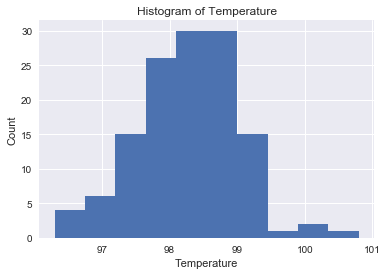

In [29]:
sns.set()

plt.hist(df['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Temperature')
plt.show()


From this histogram we see that the distribution of body temperature is about normal. On the plot we notice several points near 100-101 degrees which seem ridiculous. We can check those points.



In [223]:
df[df['temperature'] > 99.5]

,temperature,gender,heart_rate
91,100.0,F,78.0
96,99.9,F,79.0
116,100.8,F,77.0


Here we see the three females whose temperatures are around 100-101. Females are known to have higher body temperatures so it is not surprising to see that these are all females here. Since there is no way for me to examine how the data was collected or the age the females, I have no way to tell whether these values are coming from the same population of females as everyone else. It may be the case that other lurking variables affecting body temperature is present. The following page describes a few reasons why body temperature may vary: https://www.webmd.com/first-aid/normal-body-temperature#1

The data would be good only if all people involved in the experiment had relatively the same conditions when applicable. Obviously men don't have a menstrual cycle, so preferably at least the women should all be around the same stage of the menstrual cycle at the time of measurement. Otherwise, the distribution of temperature we have in the dataset is not accurate.

We can also check males and females separately to see if they are normal or not

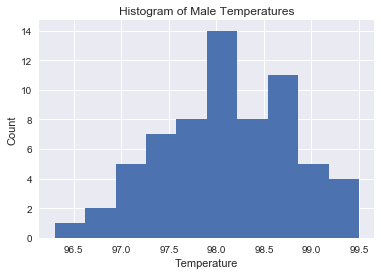

In [95]:
sns.set()
plt.hist(df.query('gender == "M"')['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Male Temperatures')
plt.show()

This almost looks normal but it has a heavy right tail. 

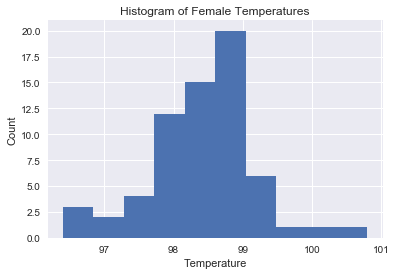

In [61]:
sns.set()

plt.hist(df.query('gender == "F"')['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Female Temperatures')
plt.show()

This is pretty close to normal

## 2. Is the sample size large? Are the observations independent?

The same size is 130 which is >= 30, large enough to apply the central limit theorem. The observations are independent because each observation represents a different person. One person's body temperature does not affect the other person's body temperature.

## 3. Is the true population mean really 98.6 degrees F?

I would use a one sample test because we want to test the hypothesis that H0: mu = 98.6

A two sample test wouldn't make sense because we would need to compare two populations; male and female.

Since our sample size is large enough for CLT to apply, z statistic is more appropriate here, but we will use bootstrap hypothesis test instead.

First we need to find the sampling distribution for temperature.





In [17]:
sample_mean = df.temperature.mean()
sample_mean

98.24923076923078

In [13]:
temperature_means = []
for i in range(10000):
    sample = df.sample(130, replace = True)
    temperature_mean = sample['temperature'].mean()
    temperature_means.append(temperature_mean)

Plot sampling distribution of temperature

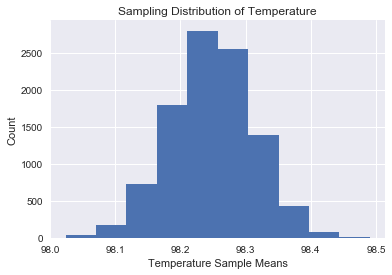

In [28]:
sns.set()
plt.hist(temperature_means)
plt.xlabel('Temperature Sample Means')
plt.ylabel('Count')
plt.title('Sampling Distribution of Temperature')
plt.show()


The sampling distribution of temperature is normal as expected. Next, simulate null values and plot null distribution

In [15]:
null_vals = np.random.normal(98.6, np.std(temperature_means), 10000)

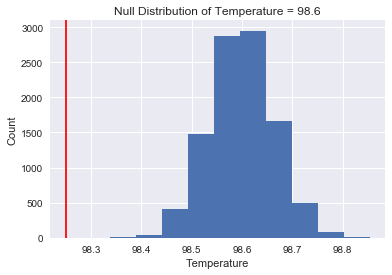

In [30]:
plt.hist(null_vals)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Null Distribution of Temperature = 98.6')
plt.axvline(x=sample_mean,  color = 'red')
plt.show()

Here we see where our sample mean in relation to the null distribution assuming that true mean of temperature is 98.6. We see that it is quite a fars off and most likely we would have a p value close to 0. We can verify by computing the p value.

In [27]:
p_value = (null_vals < sample_mean).mean() + (null_vals > 98.6 + (98.6 - sample_mean)).mean()
p_value

0.0

We see that the p value is indeed 0. We reject the null hypothesis that the true mean temperature is 98.6.

If I want to do a two sample test, we would have to reframe our question because we want to consider two populations. In the data, we have males and females. We can test the null hypothesis that there is no difference between male and female body temperatures.

In [34]:
difference_means = []
male_means = []
female_means = []
for i in range(10000):
    sample = df.sample(130, replace = True)
    male_mean = sample.query('gender == "M"')['temperature'].mean()
    female_mean = sample.query('gender == "F"')['temperature'].mean()
    difference_mean = male_mean - female_mean
    male_means.append(male_mean)
    female_means.append(female_mean)
    difference_means.append(difference_mean)

Plot sampling distributions of male temperatures, female temperatures, and the difference

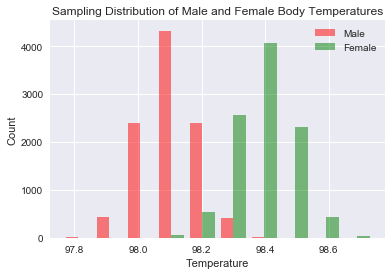

In [47]:
sns.set()

plt.hist([male_means, female_means], color = ['r', 'g'], alpha = 0.5)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Sampling Distribution of Male and Female Body Temperatures')
plt.legend(('Male', 'Female'))
plt.show()

We see the females shifted more to the right than the males as expected.

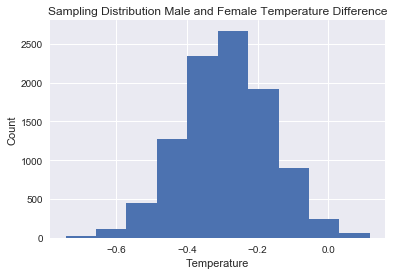

In [97]:
sns.set()

plt.hist(difference_means)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Sampling Distribution Male and Female Temperature Difference')
plt.show()

Here we notice the center of the sampling distribution is not at 0 which is to be expected given what we have found above. Males on average have a lower body temperature than females. 

Next, compute the sample difference

In [100]:
sample_difference = df.query('gender == "M"')['temperature'].mean() - df.query('gender == "F"')['temperature'].mean()
sample_difference

-0.289230769230727

Next, we simulate the null values and plot the null distribution.

In [98]:
null_vals = np.random.normal(0, np.std(difference_means), 10000)

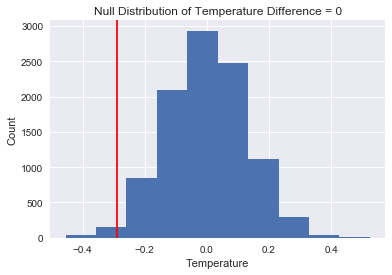

In [101]:
plt.hist(null_vals)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Null Distribution of Temperature Difference = 0')
plt.axvline(x=sample_difference,  color = 'red')
plt.show()

As expected we see our sample difference to the left of the center of the null distribution because we notice the distribution of male body temperature to be on average lower than female body temperature from above.

We can compute the p value.

In [102]:
p_value = (null_vals < sample_difference).mean() + (null_vals > 0 + (0 - sample_difference)).mean()
p_value

0.022100000000000002

We observe a p value of 0.022 and we can reject the null hypothesis that the male and female temperatures are the same at the 5% significance level.

## 4. Draw a small sample of size 10 from the data and repeat both tests.

Repeat previous again with sample = 10. Note that with a sample size < 30, it would be more appropriate to use a t test since central limit theorem does not apply but we will use a bootstrap so that doesn't matter here.

In [193]:
sample = df.sample(10, replace = True)

In [194]:
temperature_means = []
for i in range(10000):
    sample2 = sample.sample(10, replace = True)
    temperature_mean = sample2['temperature'].mean()
    temperature_means.append(temperature_mean)

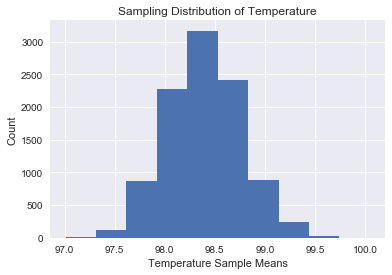

In [195]:
sns.set()
plt.hist(temperature_means)
plt.xlabel('Temperature Sample Means')
plt.ylabel('Count')
plt.title('Sampling Distribution of Temperature')
plt.show()

In [196]:
sample_mean = sample['temperature'].mean()

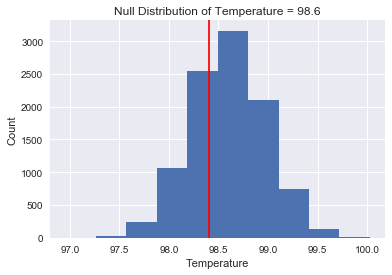

In [197]:
null_vals = np.random.normal(98.6, np.std(temperature_means), 10000)
plt.hist(null_vals)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Null Distribution of Temperature = 98.6')
plt.axvline(x=sample_mean,  color = 'red')
plt.show()

In [198]:
p_value = (null_vals < sample_mean).mean() + (null_vals > 98.6 + (98.6 - sample_mean)).mean()
p_value

0.59719999999999995

The biggest thing to note here is that our p value is no longer significant. The lower sample size resulted in a larger standard deviation for our sampling distribution. Another reason why we see a non signifcant result here is because our sample is not representative of the population. 

With smaller sample sizes we fail to reject hypotheses we would otherwise reject when the sample size is larger. This tends to be the case when we have very large sample sizes regardless of how big the difference is. Most of the time the results are not practically significant despite statistical significance.

We can repeat this for the two sample test.

In [206]:
difference_means = []
male_means = []
female_means = []
for i in range(10000):
    sample2 = sample.sample(10, replace = True)
    while (len(sample2.query('gender == "M"')) == 0) | (len(sample2.query('gender == "F"')) == 0):
        sample2 = sample.sample(10, replace = True)   
    male_mean = sample2.query('gender == "M"')['temperature'].mean()
    female_mean = sample2.query('gender == "F"')['temperature'].mean()
    difference_mean = male_mean - female_mean
    male_means.append(male_mean)
    female_means.append(female_mean)
    difference_means.append(difference_mean)

Note that a while loop is added to ensure that at least 1 female and 1 male is in the sample to prevent nan values when computing the difference

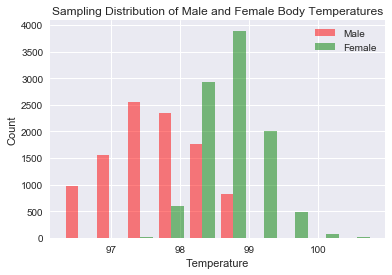

In [207]:
sns.set()

plt.hist([male_means, female_means], color = ['r', 'g'], alpha = 0.5)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Sampling Distribution of Male and Female Body Temperatures')
plt.legend(('Male', 'Female'))
plt.show()

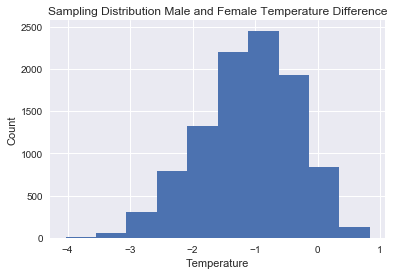

In [208]:
sns.set()

plt.hist(difference_means)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Sampling Distribution Male and Female Temperature Difference')
plt.show()

In [209]:
sample_difference = sample.query('gender == "M"')['temperature'].mean() - sample.query('gender == "F"')['temperature'].mean()
sample_difference

-1.0952380952380878

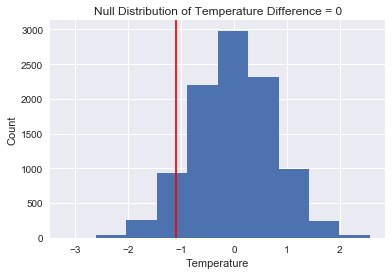

In [211]:
null_vals = np.random.normal(0, np.std(difference_means), 10000)
plt.hist(null_vals)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Null Distribution of Temperature Difference = 0')
plt.axvline(x=sample_difference,  color = 'red')
plt.show()

In [212]:
p_value = (null_vals < sample_difference).mean() + (null_vals > 0 + (0 - sample_difference)).mean()
p_value

0.14899999999999999

In this test we see a similar result as the previous. Results that were previously statistically significant is no longer significant for the same reasoning as before.

Additionally, since these samples are small, each sample does not equally represent both males and females. It may have been better to ensure that there were 5 males and 5 females in the original sample, and then ensure that 5 males and 5 females were drawn in every sample.

It is better to include the full 130 observations because both male and females are equally represented and those 130 observations better represent the population than a sample of 10 of those 130 do.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [213]:
temperature_means = []
for i in range(10000):
    sample = df.sample(130, replace = True)
    temperature_mean = sample['temperature'].mean()
    temperature_means.append(temperature_mean)

In [215]:
np.percentile(temperature_means, 2.5), np.percentile(temperature_means, 97.5)

(98.126134615384586, 98.373865384615399)

The 95% confidence interval is (98.1261, 98.3739).

If we want to consider whether someone's temperature is "abnormal", it is better to compute the males and females separately since there are other reasons why male and female body temperatures differ.

In [224]:
male_means = []
for i in range(10000):
    sample = df.query('gender == "M"').sample(65, replace = True)
    male_mean = sample.mean()
    male_means.append(male_mean)
    
female_means = []
for i in range(10000):
    sample = df.query('gender == "F"').sample(65, replace = True)
    female_mean = sample.mean()
    female_means.append(female_mean)

In [217]:
np.percentile(male_means, 2.5), np.percentile(male_means, 97.5)

(97.934716235632166, 98.272133424408011)

In [220]:
np.percentile(female_means, 2.5), np.percentile(female_means, 97.5)

(98.216389011962761, 98.626580481150782)

Since we are 95% confident that the true mean body temperature is captured in the intervals (97.9347, 98.2621) and (98.2164, 98.6266) for males and females respectively, any temperature outside those ranges would be considered abnormal.

## 6. Is there a significant difference between males and females in normal temperature?

This was answered in question 3. 

There is sufficient evidence to conclude that male and female body temperatures differ. However, we can't say anymore than that because our data is limited. These results may also be inconclusive based on if the data was properly collected and the participants had similar circumstances since there are several factors that can affect body temperature. If any one of those factors were not held as controls for all the participants, then our results are technically not reliable. If we wanted to find the true mean body temperatures for males and females, it would be better to conduct another study with all other possible variables held constant for every person allowed in the study. 

A different study altogether could be useful in finding what lowers/increases body temperature in males and females as separate groups and to what magnitude.